In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [4]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

In [5]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [7]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([2])

In [8]:
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [9]:
score = clf.score(X_test, y_test)
print(score)

0.8947368421052632


In [10]:
max_depth_range = list(range(1, 6))

accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state=0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

<ipython-input-11-4ffd4861ce8b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


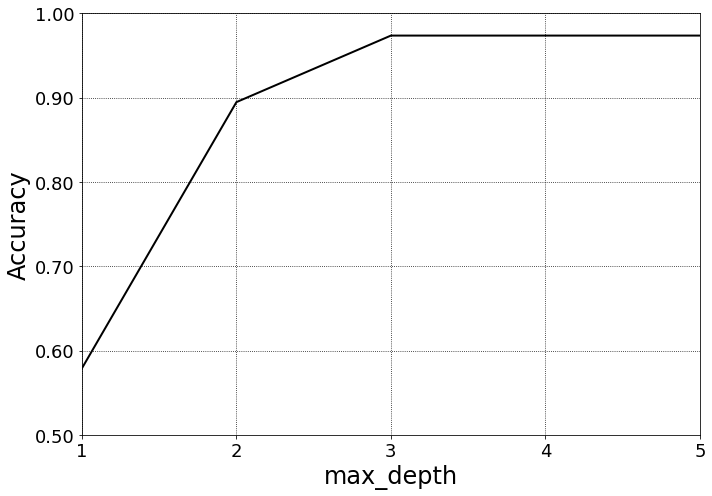

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(max_depth_range, accuracy, lw=2, color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis='both', zorder=0, linestyle=':', color='k')

yticks = ax.get_yticks()

y_ticklist = []

for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize=18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize=24)
ax.set_ylabel('Accuracy', fontsize=24)
fig.tight_layout()